In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
train = pd.read_csv('cleaned_train.csv')
test = pd.read_csv('cleaned_test.csv')

In [48]:
train.isnull().sum()

Survived       2
Pclass         2
SibSp          2
Parch          2
Gender_Name    2
male           2
Embarked_Q     2
Embarked_S     2
Age            2
dtype: int64

Drop null values

In [49]:
train.dropna(inplace=True)

In [50]:
test.dropna(inplace = True)

Train-Validation Split


In [51]:
import pandas as pd 
 
train_size = int(0.8 * len(train))


train_set = train.iloc[:train_size , : ]
val_set = train.iloc[train_size: , : ]

Defining X_train , X_val , y_train and y_val

In [52]:
X_train = train_set.drop(['Survived'],axis = 1)
X_val = val_set.drop(["Survived"],axis = 1)
y_train = train_set["Survived"]
y_val = val_set["Survived"]

## Code for implementation of KNN algorithm

In [53]:
import numpy as np
from scipy.stats import mode
 
#Euclidean Distance
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist
 
#Function to calculate KNN
def predict(x_train, y , x_input, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in x_input: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

Function to calculate accuracy 

In [54]:
def accuracy(y_true,y_pred,normalize=True):
    accuracy=[]
    for i in range(len(y_pred)):
        if y_pred[i]==y_true[i]:
            accuracy.append(1)
        else:
            accuracy.append(0)
    if normalize==True:
        return np.mean(accuracy)
    if normalize==False:
        return sum(accuracy)

## Finding the best value of K using a range of values between 1 and 80

In [55]:
accuracy_vals = []

for k in range(3,80) :
  y_preds_k = predict(np.array(X_train) , np.array(y_train) , np.array(X_val) , k)
  accuracy_k = accuracy(np.array(y_val) , y_preds_k)
  accuracy_vals.append(accuracy_k)

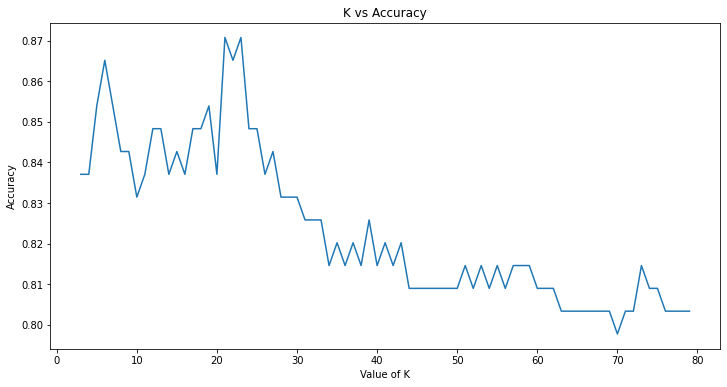

In [56]:
x_vals = np.arange(3,80)
y_vals = accuracy_vals

plt.figure(figsize = (12,6))

plt.plot(x_vals , y_vals)
plt.title("K vs Accuracy")
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

plt.show()

## From the graph of K vs Accuracy , we can infer that a value around 20-25 will give us the best accuracy

In [57]:
y_preds_best = predict(np.array(X_train) , np.array(y_train) , np.array(X_val) , 21)

In [58]:
print("Best accuracy : {} %".format(round(accuracy(np.array(y_val) , y_preds_best )*100,2)))

Best accuracy : 87.08 %
